**Task=2 Iris flower classification**

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [60]:
df=pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [64]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

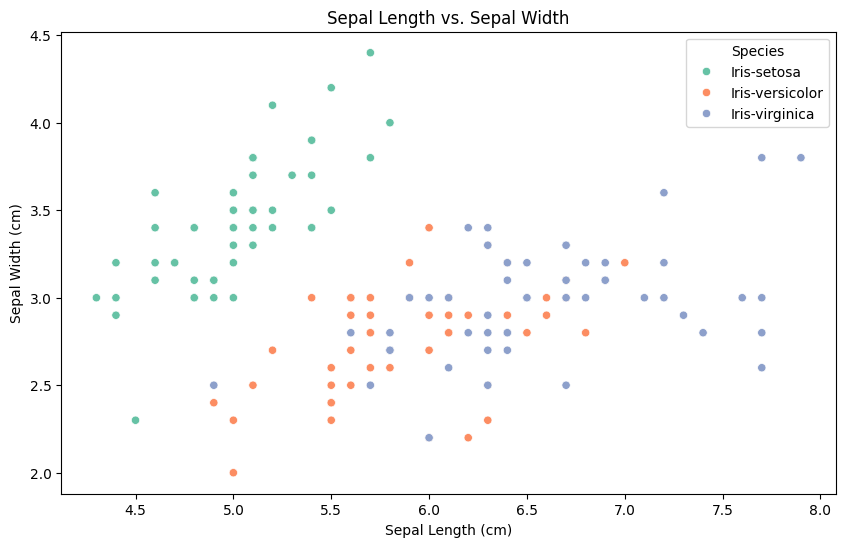

In [65]:
# Scatter plot of Sepal Length vs. Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='Set2')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

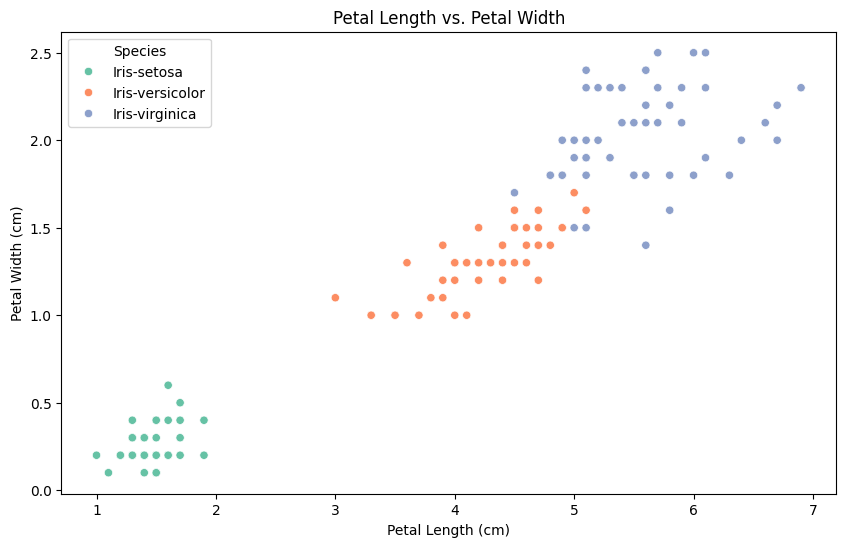

In [66]:
# Scatter plot of Petal Length vs. Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

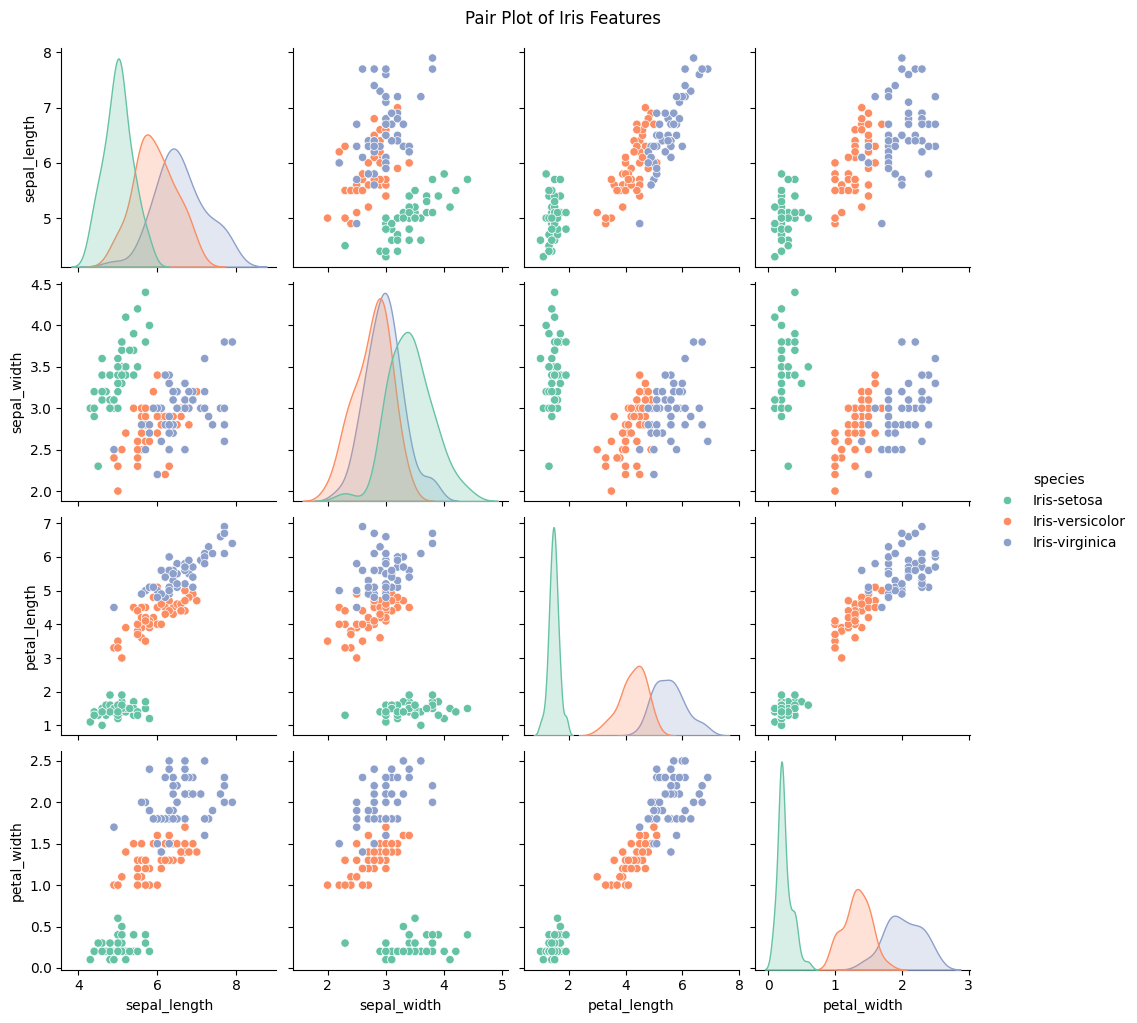

In [67]:
# Pair plot of all features colored by species
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()

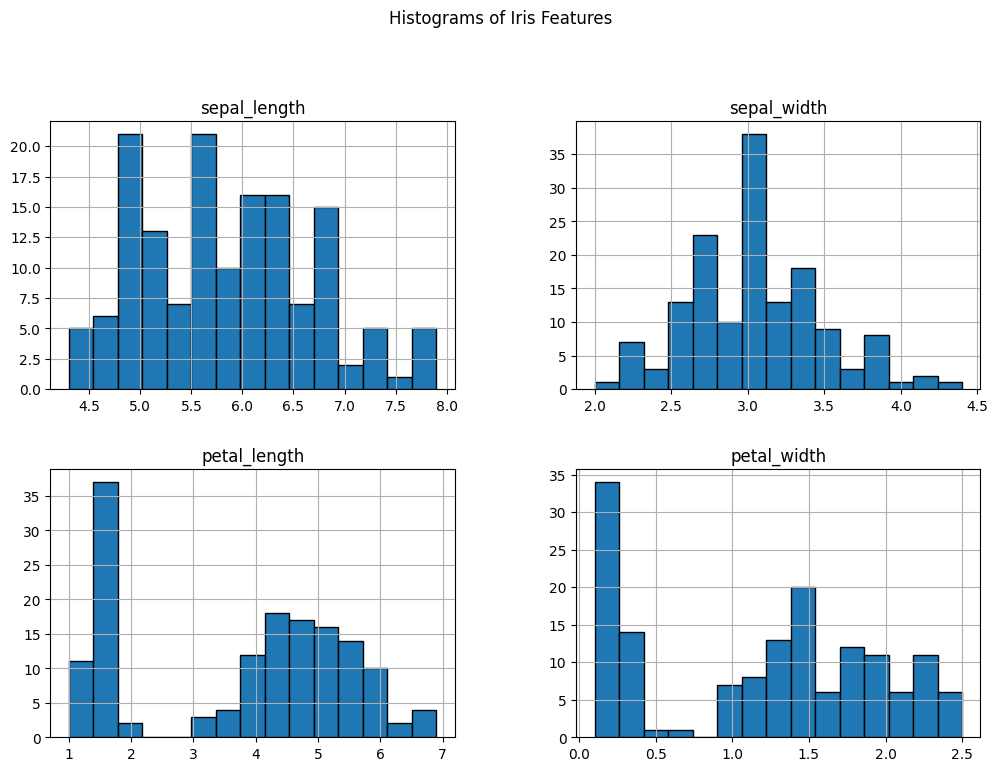

In [68]:
# Histograms for each feature
df.drop(columns='species').hist(figsize=(12, 8), bins=15, edgecolor='black', layout=(2, 2))
plt.suptitle('Histograms of Iris Features', y=1.02)
plt.show()

<ipython-input-69-b0abd03a1fc6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='sepal_length', data=df, palette='Set2')
<ipython-input-69-b0abd03a1fc6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='sepal_width', data=df, palette='Set2')
<ipython-input-69-b0abd03a1fc6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_length', data=df, palette='Set2')
<ipython-input-69-b0abd03a1fc6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

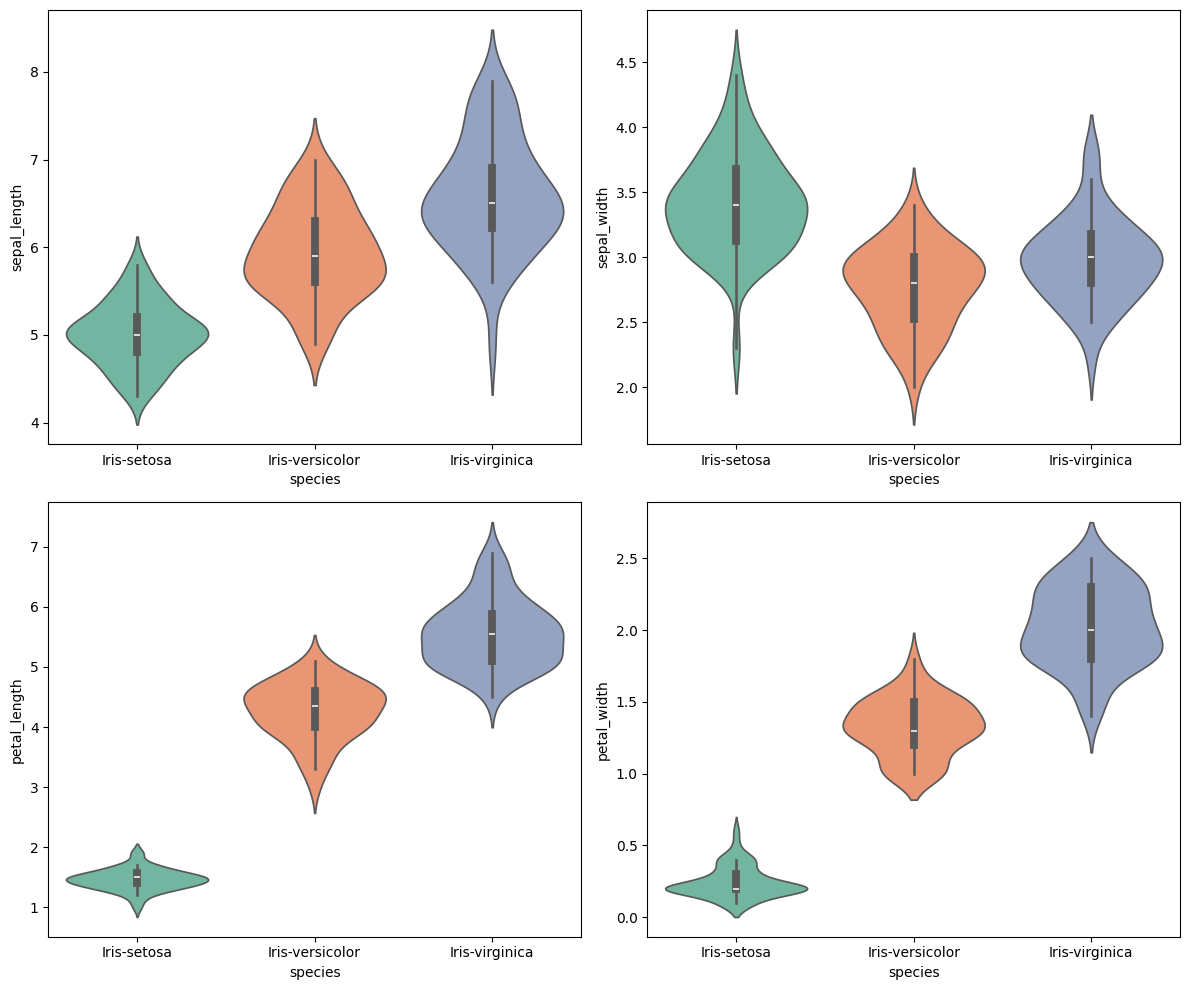

In [69]:

plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
# Violin plot for Sepal Length
sns.violinplot(x='species', y='sepal_length', data=df, palette='Set2')

plt.subplot(2,2,2)
# Violin plot for Sepal Width
sns.violinplot(x='species', y='sepal_width', data=df, palette='Set2')

plt.subplot(2,2,3)
# Violin plot for Petal Length
sns.violinplot(x='species', y='petal_length', data=df, palette='Set2')

plt.subplot(2,2,4)
# Violin plot for Petal Width
sns.violinplot(x='species', y='petal_width', data=df, palette='Set2')


# Show the plots
plt.tight_layout()
plt.show()


In [70]:
df.columns.unique()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [71]:
df["species"].nunique()

3

In [72]:
df.shape

(150, 5)

In [73]:
df["species"].replace("Iris-setosa",0,inplace=True)
df["species"].replace("Iris-versicolor",1,inplace=True)
df["species"].replace("Iris-virginica",2,inplace=True)

In [74]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [76]:
x=df.iloc[0:150,0:3]
y=df.iloc[0:150,4]

In [77]:
x

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [78]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('y_predicted values')
print(predictions)

y_predicted values
[2 0 0 1 1 0 2 1 2 0 1 1 1 2 1 2 2 1 1 0 1 1 0 2 0 1 2 1 2 1 1 2 0 2 1 1 1
 2 2 2 0 2 0 0 1 0 2 2 0 1 1 0 0 1 0 2 0 2 2 1]


In [86]:
print("y_test")
print(y_test)

y_test
125    2
9      0
43     0
50     1
77     1
47     0
104    2
119    2
140    2
20     0
69     1
87     1
73     1
110    2
64     1
102    2
117    2
94     1
61     1
34     0
71     1
123    2
36     0
120    2
18     0
96     1
128    2
84     1
149    2
52     1
91     1
116    2
40     0
113    2
74     1
63     1
53     1
105    2
111    2
135    2
46     0
121    2
41     0
19     0
62     1
31     0
103    2
133    2
44     0
92     1
127    2
1      0
6      0
98     1
24     0
142    2
12     0
141    2
130    2
146    2
Name: species, dtype: int64


In [87]:
print('Accuracy',accuracy_score(predictions,y_test))

Accuracy 0.9333333333333333
